Below is file analysis using Python, that answers the following four questions:


1. What are the most common languages?

2. Which countries have the largest reach?

3. Which sources provide the highest return on marketing investments?

3. Draw a sentiment chart over time. For days with the highest negative sentiment values, try to determine what happened then.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('disney_sample_data.csv')

print(data)

# Check the data types of each column
print(data.dtypes)

# Check for missing values in each column
print(data.isnull().sum())

# Explore summary statistics for numeric columns
print(data.describe())


      Unnamed: 0         created_date  \
0              0  2023-10-05 22:00:01   
1              1  2023-10-25 19:40:51   
2              2  2023-10-19 17:46:02   
3              3  2023-10-24 14:49:35   
4              4  2023-10-25 15:48:29   
...          ...                  ...   
4791        4791  2023-10-01 00:59:40   
4792        4792  2023-10-01 00:49:56   
4793        4793  2023-10-01 00:27:07   
4794        4794  2023-10-01 00:16:56   
4795        4795  2023-10-01 00:09:59   

                                                    url  \
0            https://www.disney.pl/marvel-w-disney-plus   
1     https://satkurier.pl/news/232301/el-clsico-na-...   
2     https://malowazne.wordpress.com/2023/10/19/klo...   
3     http://screenlovers.pl/swiat-odpremiumizowany-...   
4     https://nasz.orange.pl/t5/Telewizja/Problem-z-...   
...                                                 ...   
4791  http://twitter.com/pako_x2/statuses/1708255317...   
4792  http://twitter.com/28tommolov

In [2]:
#1. What are the most common languages?

common_languages = data['language'].value_counts()

# Print the most common languages
print(common_languages)


pl    4714
en      36
de       4
sr       4
fr       2
cs       2
sl       1
hu       1
es       1
hr       1
it       1
eo       1
zh       1
Name: language, dtype: int64


In [3]:
#2. Which countries have the largest reach?

largest_reach_hosts = data.groupby('host')['reach'].max()

# Sort the hosts by reach in descending order to find the largest reach
largest_reach_hosts = largest_reach_hosts.sort_values(ascending=False)

# Print the hosts with the largest reach
print(largest_reach_hosts)


host
instagram.com                  259915
filmozercy.com                 259901
samagame.com                   259819
facebook.com                   259802
wikingmovie.blogspot.com       259546
                                ...  
ogrodzieniec.naszemiasto.pl      5834
e-jarcar.com.pl                  5585
oiot.pl                          5577
poznajrynek.pl                   3443
nowytomysl.naszemiasto.pl        1548
Name: reach, Length: 319, dtype: int64


In [4]:
#2. Which countries have the largest reach?
# Extract two-letter country codes from the 'host' column
data['country'] = data['host'].str.extract(r'\.([a-z]{2})\.')

# Group by country and calculate the total reach
country_reach = data.groupby('country')['reach'].sum()

# Sort the results in descending order to find the countries with the largest reach
country_reach = country_reach.sort_values(ascending=False)

# Print the countries with the largest reach
print(country_reach)


country
wp    3573281
rp      88496
Name: reach, dtype: int64


In [5]:
#3. Which sources provide the highest return on marketing investments?

columns_to_keep = ['host', 'shares_count', 'likes_count']
data = data[columns_to_keep]

# Drop rows with missing values in 'shares_count' and 'likes_count'
data = data.dropna(subset=['shares_count', 'likes_count'])

# Calculate the total gain from each source
source_gain = data.groupby('host')['shares_count', 'likes_count'].sum()

# Calculate the ROI for each source
source_gain['ROI'] = (source_gain['shares_count'] + source_gain['likes_count']) / source_gain['shares_count']

# Rank the sources based on ROI in descending order
source_ranked = source_gain.sort_values(by='ROI', ascending=False)

# Print the sources with the highest ROI
print(source_ranked.head(10))

              shares_count  likes_count         ROI
host                                               
tiktok.com          2705.0    1368783.0  507.019593
facebook.com          93.0       8574.0   93.193548
twitter.com          202.0       6005.0   30.727723


C:\Users\basko\AppData\Local\Temp\ipykernel_26548\2722683275.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  source_gain = data.groupby('host')['shares_count', 'likes_count'].sum()


In [6]:
# Load the dataset
data1 = pd.read_csv('disney_sample_data (1).csv')

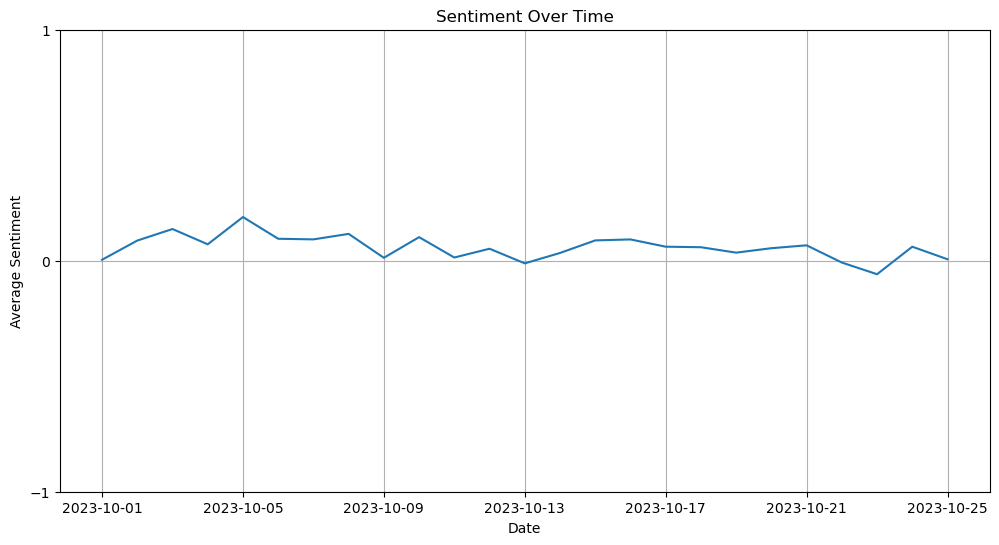

In [7]:
import matplotlib.pyplot as plt

# Check for missing values in the 'sentiment' column and fill any missing values
data1['sentiment'].fillna(0, inplace=True)

# Define a dictionary to map values
sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

# Replace values in the 'sentiment' column using the map
data1['sentiment'] = data1['sentiment'].map(sentiment_mapping)

# Convert the 'created_date' column to a datetime object
data1['created_date'] = pd.to_datetime(data1['created_date'])

# Group the data by date and calculate the average sentiment for each day
sentiment_over_time = data1.groupby(data1['created_date'].dt.date)['sentiment'].mean()

# Plot the sentiment chart over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values)
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)

#x_labels = ['2023-10-01', '2023-10-02', '2023-10-03']  # Custom x-axis labels
y_ticks = [-1, 0, 1]  # Custom y-axis tick values

#plt.xticks(x_labels)  # Set custom x-axis labels
plt.yticks(y_ticks)  # Set custom y-axis tick values


plt.show()


In [8]:
print(data1['sentiment'])

0       NaN
1       0.0
2       1.0
3       0.0
4      -1.0
       ... 
4791    1.0
4792    0.0
4793    0.0
4794    0.0
4795    0.0
Name: sentiment, Length: 4796, dtype: float64


In [11]:
# Check for NaN values in the 'sentiment' column
nan_count = data1['sentiment'].isna().sum()
print("Number of NaN values in 'sentiment' column:", nan_count)


Number of NaN values in 'sentiment' column: 4796
